In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [354]:
C_filepath = "data/XXX_heisenberg/C_array_MF.csv"
#SvN_filepath = "data/XXZ_B_0.005/SvN_array_MF.csv"

df_C = pd.read_csv(C_filepath)
#df_SvN = pd.read_csv(SvN_filepath)

In [355]:
R = 50 
N = 201
dt = 0.05
array = df_C.to_numpy()
print(df_C)
print(np.shape(array))
C_r_t_50 = array[:,1]
C_r_t_50 = np.where(C_r_t_50==0, 1.0e-92, C_r_t_50)
tmax = 275
#times = np.linspace(dt,tmax,num=int(tmax/dt))
times = array[:,0]
#times = times[:-1]

#times = df_C["times"].to_numpy()
#chi = df_C["chi"].to_numpy()
#SvN = df_SvN.to_numpy() #MAY HAVE TO TRANSPOSE THIS
#C_r_t_5 = df_C["C_5"].to_numpy()
# C_r_t_10 = df_C["C_10"].to_numpy()
# C_r_t_20 = df_C["C_20"].to_numpy()
# C_r_t_30 = df_C["C_30"].to_numpy()
# C_r_t_40 = df_C["C_40"].to_numpy()
# C_r_t_50 = df_C["C_50"].to_numpy()
# C_r_t_60 = df_C["C_60"].to_numpy()
# C_r_t_70 = df_C["C_70"].to_numpy()
# C_r_t_80 = df_C["C_80"].to_numpy()
# C_r_t_90 = df_C["C_90"].to_numpy()



       times          C_50          C_60  chi
0       0.05  3.122491e-92  9.758861e-92    8
1       0.10 -0.000000e+00 -0.000000e+00    8
2       0.15  5.224212e-92  4.983176e-92    8
3       0.20  7.092178e-92 -0.000000e+00    8
4       0.25  1.270420e-91 -0.000000e+00   10
...      ...           ...           ...  ...
3995  199.80  1.546259e-61  1.576885e-61   32
3996  199.85  1.545612e-61  1.575719e-61   32
3997  199.90  1.544924e-61  1.574555e-61   32
3998  199.95  1.544194e-61  1.573401e-61   32
3999  200.00  1.543420e-61  1.572262e-61   32

[4000 rows x 4 columns]
(4000, 4)


Text(0, 0.5, 'log(C(r,t))')

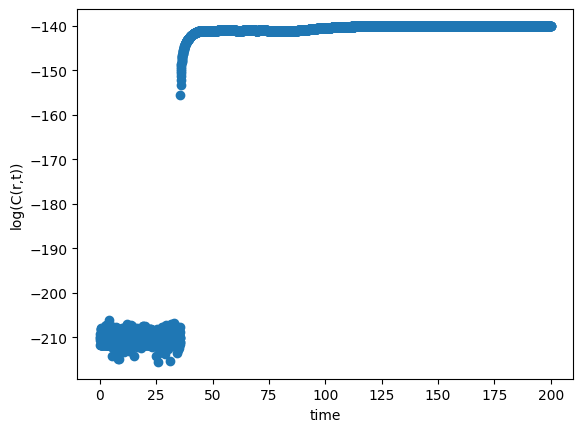

In [356]:
plt.scatter(times, np.log(C_r_t_50))
plt.xlabel("time")
plt.ylabel("log(C(r,t))")
#plt.xticks(np.arange(times.min(),times.max()+5,5))

In [357]:
t_sat = 47.1 # choose some saturation time from the plot above
stop_index = np.where(np.logical_and(times>t_sat, times<t_sat + dt))
stop_index = int(stop_index[0])
# find the index where t_sat is reached
v_B = R/t_sat # bound on v_B s.t. C(r,t) will not be complex
print(stop_index)


942


C:\Users\rache\AppData\Local\Temp\ipykernel_11408\1792608866.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  stop_index = int(stop_index[0])


In [358]:
# filter time data, and therefore C(r,t) data to be in the growth region
# i.e. not where its juts noise around 0, and before t_sat
indices = np.where(C_r_t_50 == 1.0e-92)
print(indices)
if len(indices[0]):
    last = indices[-1][-1]
    time_data = np.real(times[last+1:stop_index])
    C_data = np.real(C_r_t_50[last+1:stop_index])

else:
    time_data = np.real(times)
    C_data = np.real(C_r_t_50)



(array([  1,   5,  11,  12,  18,  21,  22,  24,  27,  36,  40,  41,  46,
        47,  51,  58,  60,  61,  64,  70,  72,  73,  74,  76,  81,  82,
        83,  85,  89,  90, 100, 104, 108, 109, 125, 130, 131, 135, 140,
       142, 152, 154, 156, 159, 162, 163, 174, 186, 187, 191, 193, 200,
       202, 214, 222, 223, 226, 227, 231, 235, 236, 237, 239, 240, 244,
       245, 250, 251, 255, 257, 269, 270, 283, 285, 297, 305, 306, 311,
       312, 314, 316, 317, 321, 326, 328, 329, 336, 346, 347, 350, 362,
       363, 366, 367, 371, 373, 374, 376, 379, 385, 387, 394, 397, 399,
       401, 405, 408, 412, 420, 424, 426, 432, 434, 436, 438, 442, 460,
       469, 475, 479, 487, 490, 493, 495, 499, 507, 508, 509, 510, 513,
       515, 519, 524, 525, 532, 535, 542, 547, 574, 581, 586, 593, 602,
       608, 610, 619, 625, 636, 644, 656, 658, 665, 671, 684, 687, 691,
       699, 703], dtype=int64),)


In [373]:
def C_early(t,p,lambda_p=567,v_B=v_B,r=R):
    return -lambda_p * ((r/v_B - (t))**(1+p))/((t)**p)

In [360]:
v_B

1.0615711252653928

In [378]:
guess = [2]
# lambda_p, p, v_B
#epsilon = 0.00000001


popt, pcov = curve_fit(C_early, time_data, C_data, p0=guess)

popt

array([145.34709968])

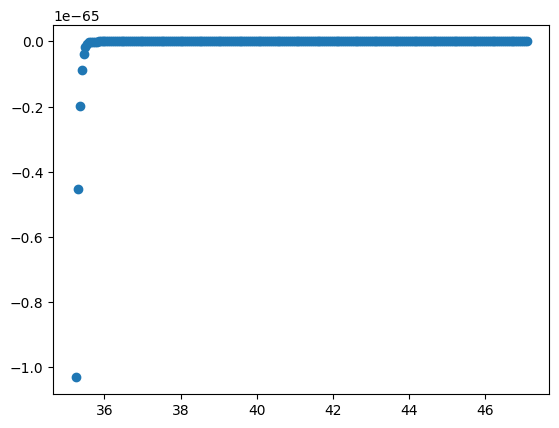

In [379]:
params = popt #[1.9,0.6,0.3]

#params = [1.0, 0.1, 0.421]
# force t < R/v_B


plt.scatter(time_data,C_early(time_data,*params))

Text(0, 0.5, 'log(C_early(r,t))')

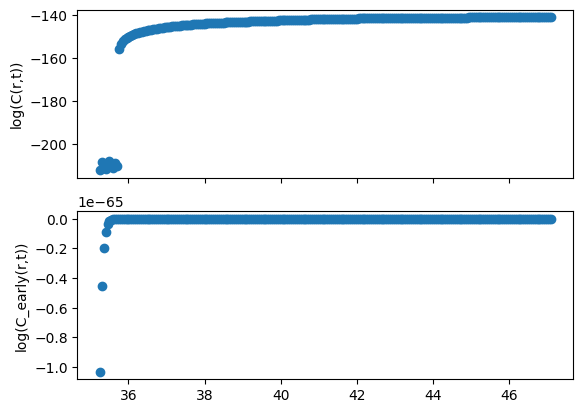

In [380]:
fig, ax = plt.subplots(2,1, sharex=True)
ax[0].scatter(time_data,np.log(C_data))
ax[0].set_ylabel("log(C(r,t))")
ax[1].scatter(time_data, C_early(time_data,*params))
ax[1].set_ylabel("log(C_early(r,t))")

Text(0, 0.5, 'log(C(r,t))')

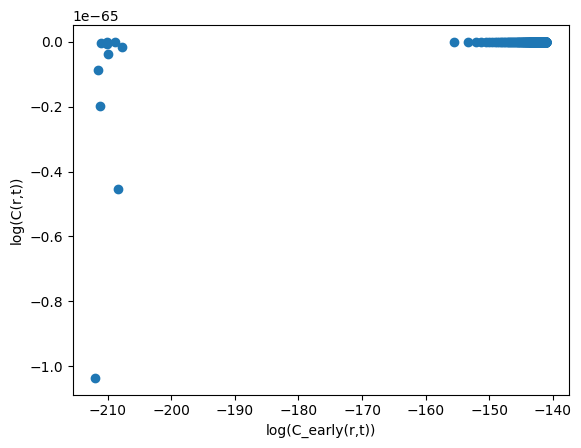

In [377]:
fig, ax = plt.subplots(1,1)
ax.scatter(np.log(C_data),C_early(time_data,*popt))
ax.set_xlabel("log(C_early(r,t))")
ax.set_ylabel("log(C(r,t))")

In [372]:
# lambda = 35
# p = 0.35
# vb= 0.53?????